In [1]:
!pip install -U sentence-transformers
!pip install biobert-embedding

     |████████████████████████████████| 55 kB 1.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-py3-none-any.whl size=74030 sha256=24fe6b16fc896ef992528a801dceea7bc9ab4e1b0388d8d0dc323756ad69ea87
  Stored in directory: /root/.cache/pip/wheels/71/eb/84/05830bceaeef549ceb0257c6797254173e197e971b3f911ee4
Successfully built sentence-transformers
     |████████████████████████████████| 748.9 MB 382 bytes/s 
  Created wheel for biobert-embedding: filename=biobert_embedding-0.1.2-py3-none-any.whl size=5701 sha256=c8ec58f2116c71aad667a59f51177604d86c673cd7e2b35f5884007f9703eb08
  Stored in directory: /root/.cache/pip/wheels/67/26/c2/176e174845e1612a5d607eea1d1876e2c9aca2b5654a5cd681
Successfully built biobert-embedding
ERROR: kornia 0.3.1 has requirement torch==1.5.0, but you'll have torch 1.2.0 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Attempting uninstall: torc

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



import seaborn as sns

import os
import sys
import tensorflow as tf
from biobert_embedding import downloader
from biobert_embedding.embedding import BiobertEmbedding
from sentence_transformers import SentenceTransformer,models

import torch
from torch.utils.data import DataLoader


from tqdm import tqdm

import math

/kaggle/input/multinlicleaned/MultiNLI_cleaned.csv
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/config.json
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/modules.json
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/similarity_evaluation_results.csv
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/1_Pooling/config.json
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/0_BERT/config.json
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/0_BERT/pytorch_model.bin
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/0_BERT/vocab.txt
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/0_BERT/special_tokens_map.json
/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli/0_BERT/tokenizer_config.json
/kaggle/input/model-weights-sbert-trained-on-

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [3]:
 ## only trained on mnli, for sentence similarity

model_path = downloader.get_BioBert("google drive")
## downloading biobert

/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

In [4]:
text="the recombinant protein reported here, together with the detailed structural information, might also be useful to others developing sars-cov-2 diagnostics and/or therapeutics."

biobert = BiobertEmbedding(model_path)

word_embeddings = biobert.word_vector(text)
sentence_embedding = biobert.sentence_vector(text)

print("Text Tokens: ", biobert.tokens)
#Text Tokens:  ['the', 'recombinant', 'protein', 'reported', 'here', ',', 'together', 'with', 'the', 'detailed', 'structural', 'information', ',', 'might', 'also', 'be', 'useful', 'to', 'others', 'developing', 'sars', '-', 'cov', '-', '2', 'diagnostics', 'and', '/', 'or', 'therapeutics', '.']

print ('Shape of Word Embeddings: %d x %d' % (len(word_embeddings), len(word_embeddings[0])))
# Shape of Word Embeddings: 31 x 768

print("Shape of Sentence Embedding = ",len(sentence_embedding))
# Shape of Sentence Embedding =  768

Text Tokens:  ['the', 'recombinant', 'protein', 'reported', 'here', ',', 'together', 'with', 'the', 'detailed', 'structural', 'information', ',', 'might', 'also', 'be', 'useful', 'to', 'others', 'developing', 'sars', '-', 'cov', '-', '2', 'diagnostics', 'and', '/', 'or', 'therapeutics', '.']
Shape of Word Embeddings: 31 x 768
Shape of Sentence Embedding =  768


In [5]:
from sentence_transformers import models,losses
from sentence_transformers import SentenceTransformer,SentencesDataset
from sklearn.model_selection import train_test_split

In [6]:
df_mancon=pd.read_csv("/kaggle/input/mancon-corpus-cleaned/manconcorpus_sent_pairs.tsv",sep="\t").rename(columns={"guid":"pairID",
                                                                                                                 "text_a":"sentence1",
                                                                                                                 "text_b":"sentence2"}) ## manconcorp

df_snli=pd.read_csv("/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_train.csv") ## stanford nli

df_multinli=pd.read_csv("/kaggle/input/multinlicleaned/MultiNLI_cleaned.csv").drop("Unnamed: 0",axis=1)

In [7]:
df_nli=pd.concat([df_multinli[['gold_label','sentence1','sentence2','pairID']],
                    df_snli[['gold_label','sentence1','sentence2','pairID']]]).rename(columns={"gold_label":"label"})
## this has snli+multinli
df_nli=df_nli[df_nli['label']!="-"]
df_nli=df_nli.dropna(how="any").reset_index(drop=True) ## removing rows with null values

In [8]:
from sentence_transformers.readers import InputExample
from sentence_transformers.evaluation import *

In [9]:
class NLIDataReader(object):
    def __init__(self,dataframe):
        self.df=dataframe.copy()
    def get_examples(self,max_examples=0):
        s1=self.df["sentence1"].values
        s2=self.df["sentence2"].values
        labels=self.df["label"].values
        guid=self.df["pairID"].values
        examples = []
        for sentence_a, sentence_b, label, guid_id in zip(s1, s2, labels, guid):

            examples.append(InputExample(guid=guid_id, texts=[sentence_a, sentence_b], label=self.map_label(label)))

            if 0 < max_examples <= len(examples):
                break

        return examples
    
    
    
    @staticmethod
    def get_labels():
        return {"contradiction": 0, "entailment": 1, "neutral": 2}

    def get_num_labels(self):
        return len(self.get_labels())

    def map_label(self, label):
        return self.get_labels()[label.strip().lower()]

In [10]:
def get_labels():
        return {"contradiction": 0, "entailment": 1, "neutral": 2}

In [11]:
df_nlitrain,df_nlitest=train_test_split(df_nli,test_size=0.2,random_state=42)
df_nlitest,df_nlival=train_test_split(df_nlitest,test_size=0.5,random_state=42)

df_mancontrain,df_mancontest=train_test_split(df_mancon,test_size=0.2,random_state=42)
df_mancontest,df_manconval=train_test_split(df_mancontest,test_size=0.5,random_state=42)

In [12]:
model_save_path="/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli/model_mnli"
model = SentenceTransformer(model_save_path)

sentence_embeddings = model.encode([text])
print("Shape of Sentence Embedding = ",len(sentence_embedding))

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.83it/s]

Shape of Sentence Embedding =  768


In [13]:
sentence_embeddings

[array([-0.13666901,  0.13369419, -0.5958281 , ..., -0.40572977,
         0.32923394, -0.2604539 ], dtype=float32)]

In [14]:
df_mancontest.columns

Index(['label', 'pairID', 'sentence1', 'sentence2'], dtype='object')

In [15]:
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [16]:
df_mancontest['sentence1_embedding']=df_mancontest['sentence1'].apply(lambda x: np.array(model.encode([x])[0]))
df_mancontest['sentence2_embedding']=df_mancontest['sentence2'].apply(lambda x: np.array(model.encode([x])[0]))

Batches: 100%|██████████| 1/1 [00:00<00:00, 10.28it/s]


In [17]:
df_mancontest['cosine_sim']=df_mancontest.apply(lambda x: np.dot(x['sentence1_embedding'],x['sentence2_embedding'])/
                                                (np.linalg.norm(x['sentence1_embedding'])*np.linalg.norm(x['sentence2_embedding'])),axis=1)

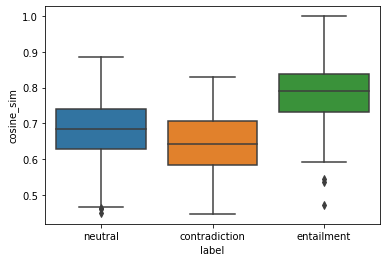

In [18]:
ax=sns.boxplot(x="label",y="cosine_sim",data=df_mancontest)

In [19]:
model_save_path="/kaggle/input/model-weights-sbert-trained-on-these-data/model_mnli_mancon/model_mnli_mancon" # trained on mnli + part mancon, for sentence similarity
model = SentenceTransformer(model_save_path)

sentence_embeddings = model.encode([text])
print("Shape of Sentence Embedding = ",len(sentence_embedding))

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

Shape of Sentence Embedding =  768


In [20]:
sentence_embeddings

[array([ 1.1168599 ,  0.09895666, -0.83114076, ...,  0.15659052,
         0.63092214, -1.0547502 ], dtype=float32)]

In [21]:
df_mancontest['sentence1_embedding']=df_mancontest['sentence1'].apply(lambda x: np.array(model.encode([x])[0]))
df_mancontest['sentence2_embedding']=df_mancontest['sentence2'].apply(lambda x: np.array(model.encode([x])[0]))

Batches: 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]


In [22]:
df_mancontest['cosine_sim']=df_mancontest.apply(lambda x: np.dot(x['sentence1_embedding'],x['sentence2_embedding'])/
                                                (np.linalg.norm(x['sentence1_embedding'])*np.linalg.norm(x['sentence2_embedding'])),axis=1)

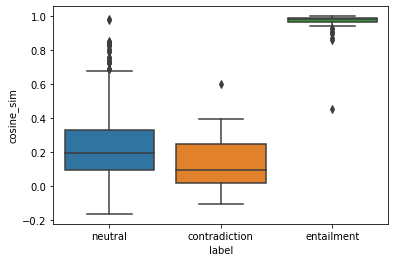

In [23]:
ax=sns.boxplot(x="label",y="cosine_sim",data=df_mancontest)

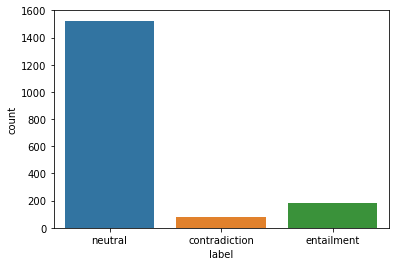

In [24]:
sns.countplot(df_mancontest['label'])

In [25]:
df_mancontrain['sentence1_embedding']=df_mancontrain['sentence1'].apply(lambda x: np.array(model.encode([x])[0]))
df_mancontrain['sentence2_embedding']=df_mancontrain['sentence2'].apply(lambda x: np.array(model.encode([x])[0]))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df_mancontrain['vector']=df_mancontrain.apply(lambda x: np.array(x.sentence1_embedding.tolist()+x.sentence2_embedding.tolist()),axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_mancontrain['target']=df_mancontrain['label'].apply(lambda x:get_labels()[x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
train_data=df_mancontrain['vector'].values
train_data = np.vstack(train_data[:][:])
train_target=df_mancontrain['target'].values

In [30]:
logreg=LogisticRegression()
logreg.fit(train_data,train_target)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
df_mancontest['sentence1_embedding']=df_mancontest['sentence1'].apply(lambda x: np.array(model.encode([x])[0]))
df_mancontest['sentence2_embedding']=df_mancontest['sentence2'].apply(lambda x: np.array(model.encode([x])[0]))
df_mancontest['vector']=df_mancontest.apply(lambda x: np.array(x.sentence1_embedding.tolist()+x.sentence2_embedding.tolist()),axis=1)
df_mancontest['target']=df_mancontest['label'].apply(lambda x:get_labels()[x])

test_data=df_mancontest['vector'].values
test_data = np.vstack(test_data[:][:])
test_target=df_mancontest['target'].values

Batches: 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]


In [32]:
test_result=logreg.predict(test_data)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
confusion_matrix(test_target,test_result)

array([[  82,    0,    0],
       [   0,  182,    3],
       [   0,    7, 1517]])

In [35]:
print(classification_report(test_target,test_result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      0.98      0.97       185
           2       1.00      1.00      1.00      1524

    accuracy                           0.99      1791
   macro avg       0.99      0.99      0.99      1791
weighted avg       0.99      0.99      0.99      1791



In [36]:
sample_df=pd.read_excel("/kaggle/input/annotation-drug-similarity/drug_individual_claims_similarity_annotated.xlsx")

In [37]:
contradiction_df=sample_df[["paper1_cord_uid","paper2_cord_uid","text1","text2","annotation"]]

In [38]:
contradiction_df.head()

,paper1_cord_uid,paper2_cord_uid,text1,text2,annotation
0,02q9y011,0a49okho,"the recombinant protein reported here, togethe...","however, our simulations suggest that even in ...",neutral
1,02q9y011,0a49okho,"the recombinant protein reported here, togethe...",our results suggest that social distancing int...,neutral
2,02q9y011,0a49okho,"the recombinant protein reported here, togethe...",this is in agreement with other modeling resul...,neutral
3,02q9y011,0a49okho,"the recombinant protein reported here, togethe...",our results suggest that the infectious period...,NaN
4,02q9y011,0a49okho,"the recombinant protein reported here, togethe...","taken together, our results suggest that more ...",NaN


In [39]:
contradiction_df=contradiction_df[~contradiction_df.annotation.isna()]

In [40]:
contradiction_df.rename(columns={"text1":"sentence1","text2":"sentence2","annotation":'label'},inplace=True)

In [41]:
contradiction_df['sentence1_embedding']=contradiction_df['sentence1'].apply(lambda x: np.array(model.encode([x])[0]))
contradiction_df['sentence2_embedding']=contradiction_df['sentence2'].apply(lambda x: np.array(model.encode([x])[0]))
contradiction_df['vector']=contradiction_df.apply(lambda x: np.array(x.sentence1_embedding.tolist()+x.sentence2_embedding.tolist()),axis=1)
contradiction_df['target']=contradiction_df['label'].apply(lambda x:get_labels()[x])

test_data_final=contradiction_df['vector'].values
test_data_final = np.vstack(test_data_final[:][:])
test_target=contradiction_df['target'].values

Batches: 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]


In [42]:
test_result=logreg.predict(test_data_final)

In [43]:
print(classification_report(test_target,test_result))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32        38
           1       0.38      0.47      0.42        38
           2       0.36      0.48      0.41        31

    accuracy                           0.39       107
   macro avg       0.41      0.40      0.39       107
weighted avg       0.42      0.39      0.38       107



In [44]:
get_labels()

{'contradiction': 0, 'entailment': 1, 'neutral': 2}

In [45]:
contradiction_df['predicted']=test_result

In [46]:
contradiction_df.to_csv("Result_annotation.csv",index=False)